In [ ]:
from sklearn.datasets import load_digits

dataset = load_digits()
data=dataset.data
images=dataset.images
target=dataset.target

print('data shape:',data.shape)
print('images shape:',images.shape)
print('data shape:',target.shape)

data shape: (1797, 64)
images shape: (1797, 8, 8)
data shape: (1797,)


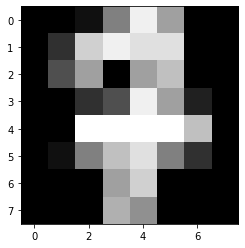

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(images[17],cmap='gray')

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#import KNN Algorithm

model=KNeighborsClassifier(n_neighbors=3) #loading our algorithm into an object called model. Setting K=3.
#New KNN Algorithm (Object)

model.fit(train_data,train_target) #we have trained our model now.
#training the KNN Algorithm

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Applying testing images into the trained model
predicted_targets = model.predict(test_data)

In [ ]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target,predicted_targets)
print('Accuracy:',acc)

Accuracy: 0.9916666666666667


#KNN from Scratch

In [ ]:
# distance metrics
import numpy as np
from scipy.stats import mode

def eucledian(p1, p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
  
def manhattan(p1, p2):
    dist = sum(np.abs(p1-p2))
    return dist

# function to calculate KNN
def knn_classify(x_train, y, x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [ ]:
predicted_data = knn_classify(train_data, train_target, test_data, 7)
from sklearn.metrics import accuracy_score

acc_scr=accuracy_score(test_target,predicted_data)
print('Accuracy:',acc_scr)

Accuracy: 0.9888888888888889


# Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(train_data, train_target)
y_pred_dt = dt_classifier.predict(test_data)
print("The accuracy is : ", accuracy_score(test_target, y_pred_dt))

The accuracy is :  0.9


# Using Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf_classifier.fit(train_data, train_target)
y_pred_rf = rf_classifier.predict(test_data)
from sklearn.metrics import confusion_matrix, accuracy_score
print("The accuracy is : ", accuracy_score(test_target, y_pred_rf))

The accuracy is :  0.975


# Using Deep Learning 

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
 686/1688 [===========>..................] - ETA: 24s - loss: 0.2650 - accuracy: 0.9190

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])